In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Sample data
hours = np.array([0, 1, 1, 5, 9, 9, 10, 11, 12, 12])
gpa = np.array([0, 0, 0, 2, 3, 3, 3, 4, 4, 4])

# Homework

1. จากโค้ดที่มีไว้เพื่อสร้าง data ต่อไปนี้
$$\textbf{y} = 3\textbf{x}^3 + 2\textbf{x}^2 + 3\textbf{x} + 4 + 2m*(rand(100,1)-1); m = noise $$
``` python
m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = (X ** 3) + 2 * (X ** 2) + 3 * (X ** 1) + 4 + ((np.random.rand(100, 1) * 2 - 1) * m)
```
  1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)
  ``` python
  class LinearRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.coef_ = None
          self.intercept_ = None

      def fit(self, X, y):
          """
          Fits the linear regression model to the given data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the input data.
              y: A numpy array of shape (n_samples,) representing the
  target values.
          """
          # Calculate coefficients using the closed-form solution
          ...

      def predict(self, X):
          """
          Predicts the target values for new data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the new input data.
          Returns:
              A numpy array of shape (n_samples,) representing the predicted target values.
          """
          return np.dot(X, self.coef_) + self.intercept_
  ```
  1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ
  ``` python
  # param init
  a0, a1, a2 = ...
  alpha = ...  # learning rate
  iterations = ...  # iteration of Gradient Descent
  m = len(hours)

  # forward
    class PolyRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.a2 = 1
          self.a1 = 1
          self.a0 = 1

      def predict(x, a0, a1, a2):
          return a2 * x**2 + a1 * x + a0

      # Cost function (MSE)
      def compute_cost(self, hours, gpa):
          ...

      # Gradient Descent
      for _ in range(iterations):
          predictions = ...

          # gradient compute
          ...

          # parameter update
          ...

          # cost compute if more iteration (optional)
          if _ % 100 == 0:
              print(f"Iteration {_}, Cost: {compute_cost(self, hours, gpa)}")

      # print(f"Optimized a0: {a0}, a1: {a1}, a2: {a2}")

  ```
  1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree เอง และนำ extended dataset ไป fit กับโมเดล Linear Regression
  ``` python
  from sklearn.preprocessing import PolynomialFeatures
  d = ? #เเทนค่าด้วย Degree ที่ควรจะใช้
  poly_features = PolynomialFeatures(degree=d, include_bias=False)
  X_poly = poly_features.fit_transform(X_HW)
  X_HW[0], X_poly[0]

  model = ? # เเทนค่า Linear Regression โมเดลที่ฝึกมาลงในตัวเเปล model
  ```

  1.4  เเเสดงผล plot จาก matplotlib.pyplot ตามโค้ดต่อไปนี้
  ``` python
  # Plot the data
  plt.plot(X_HW, y_HW, "b.", label='Sampling data')
  x = np.linspace(-3, 3, 1000)

  #...linear and non-linear equation สำหรับพล็อตเส้นถดถอย ????...

  plt.plot(x, y_linear, "y-.", label='Lin-Reg fitting', linewidth=0.25)
  plt.plot(x, y_p2_sc, "r--", label='Poly-Reg (power=2) from my class function', linewidth=0.5)
  plt.plot(x, y_p2_scikit, "g--", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.75)
  plt.title('LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)')
  plt.legend()
  ```

  1.5 วัดผลความแปรปรวนของตัวแปรตามหรือความเข้ากันของระบบเชิงเส้นถดถอยที่ทำนายต่อตัวแปรตามจริงจากระบบวัด R-Squared (R^2 metric) จากทั้ง 3 สมการที่ทำนายพร้อมอธิบายความแตกต่างจากการวัดและแสดงผลที่เกิดขึ้น

In [286]:

m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = 3 * (X_HW ** 3) + 2 * (X_HW ** 2) + 3 * (X_HW ** 1) + 4 + (2 * m * (np.random.rand(100, 1) - 1))

In [287]:
# 1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the
target values.
        """
        # Calculate coefficients using the closed-form solution
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

        ...

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

In [288]:
# 1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ
alpha = 1e-3  # learning rate
iterations = 1000  # iteration of Gradient Descent
m = len(X_HW)

# forward
class PolyRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.a2 = 1
        self.a1 = 1
        self.a0 = 1

    def predict(self, x):
        return self.a2 * x**2 + self.a1 * x + self.a0

    # Cost function (MSE)
    def compute_cost(self, X_HW, y_HW):
        predictions = self.predict(X_HW)
        cost = (1/(m)) * np.sum((predictions - y_HW)**2)
        return cost

    def fit(self, X_HW, y_HW):
        # Gradient Descent
        for _ in range(iterations):
            predictions = self.predict(X_HW)
            # gradient compute
            dJ_da0 = (2/m) * np.sum(predictions - y_HW)
            dJ_da1 = (2/m) * np.sum((predictions - y_HW) * X_HW)
            dJ_da2 = (2/m) * np.sum((predictions - y_HW) * X_HW**2)
            # parameter update
            self.a0 -= alpha * dJ_da0
            self.a1 -= alpha * dJ_da1
            self.a2 -= alpha * dJ_da2
            # cost compute if more iteration (optional)
            if _ % 100 == 0:
                print(f"Iteration {_}, Cost: {self.compute_cost(X_HW=X_HW, y_HW=y_HW)}")
        
        print(f"Optimized a0: {self.a0}, a1: {self.a1}, a2: {self.a2}")

poly_reg_scratch = PolyRegressionScratch()
poly_reg_scratch.fit(X_HW, y_HW)

Iteration 0, Cost: 175.55695460909922
Iteration 100, Cost: 32.777133572995304
Iteration 200, Cost: 9.210917833476199
Iteration 300, Cost: 5.052714606161557
Iteration 400, Cost: 4.091180764278277
Iteration 500, Cost: 3.6879224411593294
Iteration 600, Cost: 3.409075016015052
Iteration 700, Cost: 3.1794626460910127
Iteration 800, Cost: 2.9828091545253055
Iteration 900, Cost: 2.812972558639048
Optimized a0: 2.13798973698273, a1: 3.7511957152492426, a2: 6.68417051201927


In [289]:
# 1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree เอง และนำ extended dataset ไป fit กับโมเดล Linear Regressio
from sklearn.preprocessing import PolynomialFeatures
X_HW_reshape, y_HW_reshape = X_HW.reshape(-1, 1), y_HW.reshape(-1, 1) 
d = 3 #เเทนค่าด้วย Degree ที่ควรจะใช้
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X_HW_reshape)
print(X_HW_reshape[0], X_poly[0])


[1.06174341] [1.06174341 1.12729908 1.19690237]


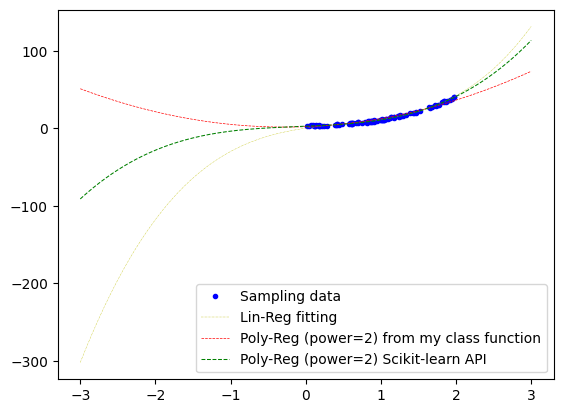

In [291]:
# 1.4  เเเสดงผล plot จาก matplotlib.pyplot ตามโค้ดต่อไปนี้

# Plot the data
plt.plot(X_HW, y_HW, "b.", label='Sampling data')
x = np.linspace(-3, 3, 1000).reshape(-1, 1)
# x = np.linspace(min(X_HW), max(X_HW), 100).reshape(-1, 1) 

lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_poly, y_HW_reshape)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_HW_reshape)

# test 
y_linear = lin_reg_scratch.predict(poly_features.fit_transform(x))  # Linear regression (reshape x for compatibility)
y_p2_sc = poly_reg_scratch.predict(x)
y_p2_scikit = lin_reg.predict(poly_features.fit_transform(x))

plt.plot(x, y_linear, "y-.", label='Lin-Reg fitting', linewidth=0.25)
plt.plot(x, y_p2_sc, "r--", label='Poly-Reg (power=2) from my class function', linewidth=0.5)
plt.plot(x, y_p2_scikit, "g--", label='Poly-Reg (power=2) Scikit-learn API', linewidth=0.75)
# plt.title('LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)')
plt.legend()

In [284]:
# * 1.5 วัดผลความแปรปรวนของตัวแปรตามหรือความเข้ากันของระบบเชิงเส้นถดถอยที่ทำนายต่อตัวแปรตามจริงจากระบบวัด R-Squared (R^2 metric) จากทั้ง 3 สมการที่ทำนายพร้อมอธิบายความแตกต่างจากการวัดและแสดงผลที่เกิดขึ้น
from sklearn.metrics import r2_score

y_linear2 = lin_reg_scratch.predict(poly_features.fit_transform(X_HW))
y_poly2 = poly_reg_scratch.predict(X_HW)
y_scikit2 = lin_reg.predict(poly_features.fit_transform(X_HW))

r2_linear = r2_score(y_HW, y_linear2)
r2_poly = r2_score(y_HW, y_poly2)
r2_scikit = r2_score(y_HW, y_scikit2)

print(f"R² for Linear Regression: {r2_linear:.4f}")
print(f"R² for Polynomial Regression (Manual): {r2_poly:.4f}")
print(f"R² for Polynomial Regression (Scikit): {r2_scikit:.4f}")

R² for Linear Regression: 0.9948
R² for Polynomial Regression (Manual): 0.9787
R² for Polynomial Regression (Scikit): 0.9975
